### 1d

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
year_to_seconds = 365.*24*3600
t0 = 0
tf = 1*year_to_seconds
period = 1*year_to_seconds # Earth year in seconds
theta0 = 0
a = 1*1.496e13 # 1 AU in cm
e = 0 # circle
m_star = 1*1.988e33 # 1 solar mass in grams 
r0 = a*(1-e) # periastron, aka initial/seeding distance
G = 6.674e-8 # in cgs (previously 1 in solar mass/AU/year units)

def update_theta(specific_L, r, delta_t):
    delta_theta = (specific_L/(r**2)) * delta_t
    return delta_theta

def calc_specific_L(a, e, m_star):
    return np.sqrt(G * m_star * a * (1-e**2))

def calc_r(a, e, theta):
    numerator = a*(1-e**2)
    denominator = 1 + e*np.cos(theta)
    return numerator/denominator

specific_L = calc_specific_L(a, e, m_star)
print(specific_L)

4.455198800502622e+19


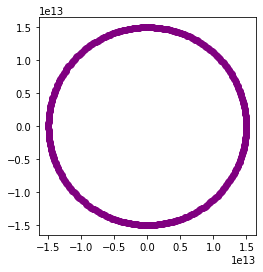

In [4]:
times = np.linspace(t0, tf, 366) # one iteration per day
delta_t = 1.*year_to_seconds/365
theta = theta0 # initialize theta at theta0
r = r0 # initialize r at r0
fig = plt.figure()
ax = fig.add_subplot(111,aspect='equal') # force 1 to 1 aspect ratio to confirm that it's a circle
for times_elt in times:
    delta_theta = update_theta(specific_L, r, delta_t)
    theta = theta + delta_theta
    r = calc_r(a, e, theta)
    x = r*np.cos(theta)
    y = r*np.sin(theta)
    #print(theta, x, y)
    plt.scatter(x, y, color='purple')
plt.show()

### 2d

In [5]:
tf

31536000.0

period:  22584524.32814435
delta t:  228126.50836509443
0.004383561643835599 220.98267905194433
0.0059216984466824345 121.09323878779854
0.12778285119609392 0.26005626589649133
0.8559157720883359 0.005796294087896002
0.9041779489832003 0.005194032325823358
0.9493725068396225 0.0047112827494743634
0.9918517015452663 0.0043163731800551575
1.0318923881441553 0.003987894431811957
1.069717366322236 0.0037108583591417355
1.1055094116685045 0.0034744621285184235
1.1394208657775362 0.00327072578122746
1.171580405838855 0.003093629293440534
1.2020979547618074 0.002938547764165746
1.2310683260492603 0.002801871125449094
1.2585739840866903 0.0026807417018773084
1.2846871712717272 0.002572869129403204
1.3094715725040196 0.0024763972973330293
1.332983635422384 0.00238980703499133
1.3552736302835848 0.0023118438351958266
1.3763865100498311 0.002241463420838874
1.3963626151251334 0.002177790229026239
1.4152382558453618 0.0021200853815807833
1.4330461977172655 0.002067721713902694
1.4498160685075432 0

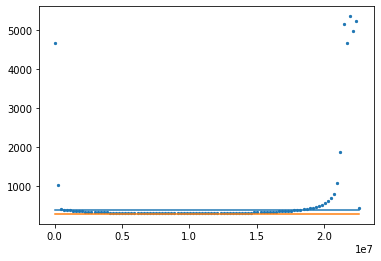

In [11]:
stefan_boltzmann = 5.67e-5 # g s^-3 K^-4
L_star = 3.839e33 # erg/s
a = 0.8*1.496e13
e = 363./365 # from my bday
#e = 0.4
A = 0.3
specific_L = calc_specific_L(a, e, m_star) # recalculate specific L using new a and e

def teff(L_star, d, A): # where d is distance from star, ie. r
    return (L_star*(1-A)/(4*np.pi*stefan_boltzmann*d**2))**0.25

def calc_period(a, m_star):
    tf = ((4*np.pi**2*a**3)/(G*(m_star)))**0.5 # take m_p as zero, since m_p << m_star
    return tf

# calculate instantaneous Teff at every timestep
temps = []
rs = []
theta = theta0 # initialize theta at theta0
r0 = a*(1-e) # recalculate new initial distance
r = r0 # and initialize r
tf = calc_period(a, m_star) # recalculate tf
print("period: ", tf)
times = np.linspace(t0, tf, 100) 
delta_t = times[1]-times[0]
print("delta t: ", delta_t)
for times_elt in times:
    delta_theta = update_theta(specific_L, r, delta_t)
    print(r/1.496e13, delta_theta)
    theta = theta + delta_theta
    r = calc_r(a, e, theta)
    rs.append(r)
    temp = teff(L_star, r, A)
    temps.append(temp)
    
plt.scatter(times, temps, s=5, label="Teff")
plt.plot(times, np.ones(len(times))*373, label="boiling pt")
plt.plot(times, np.ones(len(times))*273, label="freezing pt")
#plt.ylim(0, 900)
plt.show()

In [7]:
print(max(rs)/1.496e13)
print(min(rs)/1.496e13)
print(max(temps), min(temps))

1.119958699873516
0.4800003415875752
520.048966125731 340.45836303999005


In [12]:
theta

1203.108621379137

In [9]:
temps[-1]

519.0536557787417